In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.asc()).first()
recent_date


('2010-01-01',)

In [13]:
# Showing the columns in Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fde86b98a50>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [12]:
# Showing the columns in Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fde860f69d0>,
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

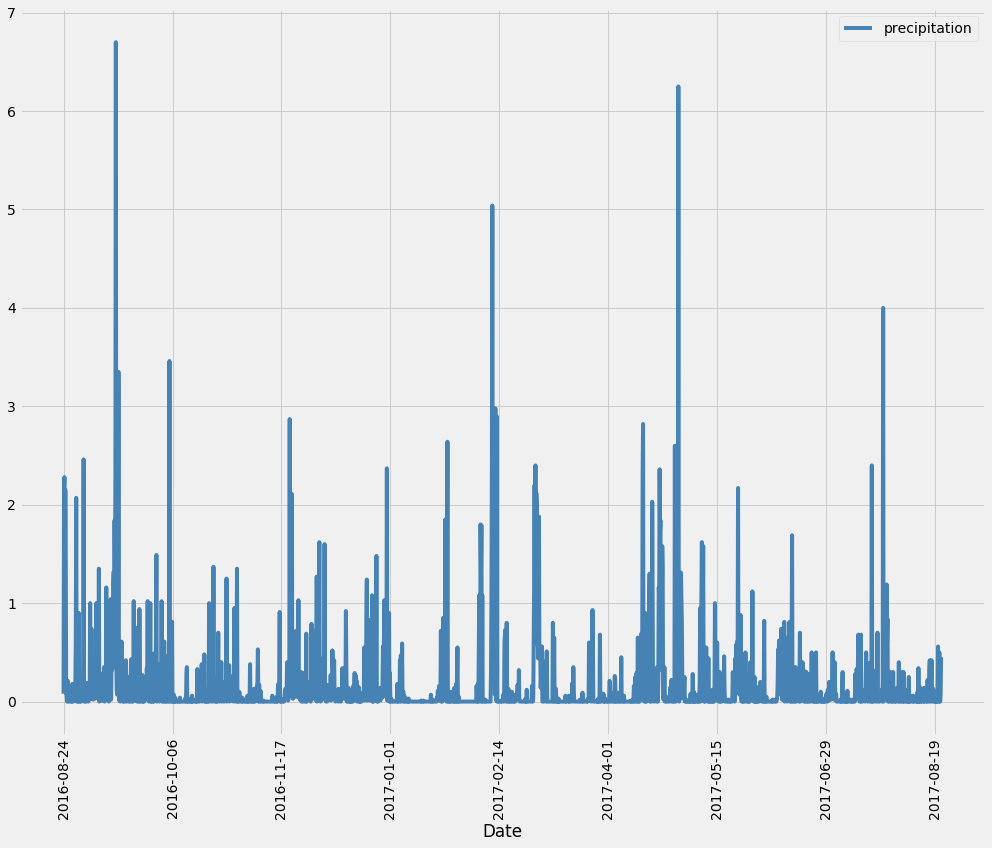

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
str_date=list(np.ravel(recent_date))[0]
latest_date=dt.datetime.strptime(str_date,"%Y-%m-%d")
year=latest_date-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).filter(Measurement.date>=year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)


# Sort the dataframe by date
df.sort_values(by=['date'], ascending=True)
df=df.dropna()
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
ax=df.plot(color='steelblue',figsize=(14,12),legend=True,grid=True)
plt.setp(ax.get_xticklabels(), visible=True,rotation=90)
plt.tight_layout()
plt.xlabel('Date')
plt.show()



In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = df['precipitation'].describe()
print(stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Station.id).count()
station_count

9

In [99]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_group=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_group

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active='USC00519281'
most_active_stats=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
mostactivestats

[(54.0, 85.0, 71.66378066378067)]

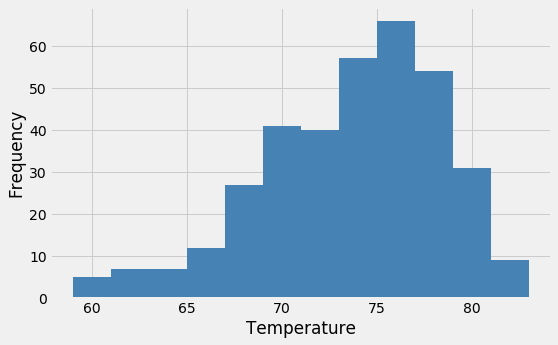

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_date=session.query(Measurement.date).order_by(Measurement.date.desc()).\
             filter(Measurement.station=='USC00519281').first()
str_date=list(np.ravel(results_date))[0]
latest_date=dt.datetime.strptime(str_date,"%Y-%m-%d")
year=latest_date-dt.timedelta(days=365)

results=session.query(Measurement.tobs).\
             filter(Measurement.station==station_Measurment_join[0][0]).\
             filter(Measurement.date>=year).all()
df2=pd.DataFrame(results)
df2.head()


plot_hist=df2[0].hist(bins=12,figsize=(8,5), color='steelblue', zorder=2)
plot_hist.set_ylabel("Frequency")
plot_hist.set_xlabel("Temperature")
plt.show()

# Close session

In [96]:
# Close Session
session.close()